In [4]:
import matplotlib.pyplot as plt 
from matplotlib import font_manager

font_dir = ['C:/Users/anton_zwjvzg0/Documents/506Stuff/project/GTAmerica Font']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
plt.rcParams['font.family'] = 'GT America'

In [5]:
import numpy as np
import pandas as pd
import folium

from folium import plugins
from folium.plugins import HeatMap

df = pd.read_csv('employee-earnings-report-2021.csv', encoding = "ISO-8859-1")
df_2020 = pd.read_csv('city-of-boston-calendar-year-2020-earnings.csv', encoding = "ISO-8859-1")
df_2019 = pd.read_csv('allemployeescy2019_feb19_20final-all.csv', encoding = "ISO-8859-1")
df_2018 = pd.read_csv('employeeearningscy18full.csv', encoding = "ISO-8859-1")
#initial data
df_2020

nan_name_with_gross = df_2020[df_2020['NAME'].isnull()]

nan_name_with_gross

nan_name_with_gross = df[df['NAME'].isnull()]

nan_name_with_gross

#ONLY 2021 HAS NAN RECORDS IN NAMES, SO ONLY HAVE TO CLEAN THAT ONE UP

df_2020

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN / EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Smith,Sean P",Boston Police Department,Police Lieutenant,"$145,787.56",NaN,"$13,160.94","$124,395.57",NaN,"$45,210.00","$36,447.09","$365,001.16",02186
1,"Lee,Waiman",Boston Police Department,Police Detective,"$108,803.25",NaN,"$16,324.27","$96,126.59",NaN,"$111,688.00","$27,200.78","$360,142.89",02134
2,"Brown,John M",Boston Police Department,Police Sergeant (Det),"$132,699.44",NaN,"$19,672.83","$155,123.11",NaN,"$5,088.00","$33,175.06","$345,758.44",02136
3,"Danilecki,John H",Boston Police Department,Police Captain,"$162,770.15",NaN,"$24,504.13","$64,326.60","$3,548.13","$43,200.00","$41,579.47","$339,928.48",02081
4,"Barrett,Thomas E.",Boston Police Department,Police Sergeant (Det),"$132,699.44",NaN,"$16,723.95","$156,754.23",NaN,NaN,"$33,175.06","$339,352.68",02132
...,...,...,...,...,...,...,...,...,...,...,...,...
21853,"Homan,Paul A",BPS Substitute Teachers/Nurs,Substitute Teacher,$1.52,NaN,NaN,NaN,NaN,NaN,NaN,$1.52,02188
21854,"Lane,Cheryl A",BPS Substitute Teachers/Nurs,Sub Teacher - Retiree,$0.38,NaN,NaN,NaN,NaN,NaN,NaN,$0.38,02346
21855,"Cura,Miguel",BPS Substitute Teachers/Nurs,Substitute Teacher HE,$0.38,NaN,NaN,NaN,NaN,NaN,NaN,$0.38,02067
21856,"Nelson,Philip F",BPS Substitute Teachers/Nurs,Substitute Teacher HE,$0.38,NaN,NaN,NaN,NaN,NaN,NaN,$0.38,02132


In [12]:
df[(df['NAME'].str.contains('Linnane') == True) & (df['NAME'].str.contains('Brendan') == True)]

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS,POSTAL
2299,"Linnane,Brendan M",Boston Police Department,Police Officer,"90,081.28",NaN,800.00,"28,371.76",NaN,"16,514.00","18,016.22","153,783.26",02122


In [49]:
#visualizing all rows with NaN for name:
nan_name_with_gross = df[df['NAME'].isnull()]

nan_name_with_gross

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS,POSTAL
22546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#clearly these are useless records since everything is NaN so we can remove them
df = df[df['NAME'].notna()]

#now we can see which columns have total_gross as NaN
nan_name_with_gross = df[df['TOTAL_GROSS'].isnull()]

nan_name_with_gross

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS,POSTAL


In [5]:
#clearly these are useless records since everything is NaN so we can remove them
df_2020 = df_2020[df_2020['NAME'].notna()]

#now we can see which columns have total_gross as NaN
nan_name_with_gross = df_2020[df_2020['TOTAL EARNINGS'].isnull()]

nan_name_with_gross

KeyError: 'TOTAL EARNINGS'

In [5]:
#great, there are none! that means all rows that we have left have both name and total_gross being numbers

#top 10 earners by total gross:

#first converting total gross column to float:

#we need to remove commas so the strings can be turned into floats:
df['TOTAL_GROSS'] = df['TOTAL_GROSS'].astype(str)

df['TOTAL_GROSS']=df['TOTAL_GROSS'].str.replace(',','')

#now we convert to floats
df['TOTAL_GROSS'] = df['TOTAL_GROSS'].astype(float)

top10earners = df.nlargest(n=10, columns=['TOTAL_GROSS'])

top10earners

C:\Users\ANTON_~1\AppData\Local\Temp/ipykernel_8700/3808893321.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOTAL_GROSS'] = df['TOTAL_GROSS'].astype(str)
C:\Users\ANTON_~1\AppData\Local\Temp/ipykernel_8700/3808893321.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOTAL_GROSS']=df['TOTAL_GROSS'].str.replace(',','')
C:\Users\ANTON_~1\AppData\Local\Temp/ipykernel_8700/3808893321.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS,POSTAL
0,"Beckers,Richard",Boston Police Department,Police Officer,NaN,NaN,"1,264,843.63",NaN,NaN,NaN,NaN,1264843.63,02119
1,"McGowan,Jacqueline M.",Boston Police Department,Police Officer,NaN,NaN,"1,252,990.81",NaN,NaN,NaN,NaN,1252990.81,02129
2,"Harris,Shawn N",Boston Police Department,Police Offc Comm Serv Offc 3$8,"69,772.10",NaN,"212,739.48","82,300.87","30,939.24","12,144.00","25,178.06",433073.75,02130
3,"Washington,Walter",Boston Police Department,Police Officer,"100,963.38",NaN,"211,900.28","67,849.66",NaN,"9,016.00","10,096.55",399825.87,02368
4,"Mosley Jr.,Curtis",Boston Police Department,Police Offc Comm Serv Offc 3$8,"109,858.02",NaN,"192,097.54","75,938.65",NaN,"19,550.00",NaN,397444.21,02301
5,"Joseph,Martin M",Boston Police Department,Police Sergeant (Det),"127,626.76",NaN,"124,524.50","66,433.83",NaN,"50,085.00","12,762.78",381432.87,02124
6,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"142,466.41",NaN,"15,820.50","167,509.61",NaN,"24,695.00","28,198.49",378690.01,02052
7,"Smith,Sean P",Boston Police Department,Police Lieutenant,"143,566.78",NaN,"16,789.43","109,101.43",NaN,"53,240.00","35,891.85",358589.49,02186
8,"Lee,Waiman",Boston Police Department,Police Detective,"107,352.54",NaN,"16,324.27","76,434.46",NaN,"123,234.00","26,838.11",350183.38,02134
9,"Barrett,Thomas E.",Boston Police Department,Police Sergeant (Det),"130,930.12",NaN,"16,723.95","166,042.24",NaN,NaN,"32,732.73",346429.04,02132


In [6]:
#finding average salary of top 10 earners:

avgoftop10 = top10earners['TOTAL_GROSS'].mean()

avgoftop10

556350.3060000001

In [7]:
#findin average of entire dataset:
avgofall = df['TOTAL_GROSS'].mean()

avgofall

82792.6631872616

In [8]:
#now we will do the same as in previous cells for the 3 previous years, 2018, 2019, 2020

In [6]:
#number of police officers (compared to other employees):
#police officers:
all_officers_2021 = df[df['TITLE'] == 'Police Officer']
num_officers_2021 = len(all_officers_2021)

all_officers_2020 = df_2020[df_2020['TITLE'] == 'Police Officer']
num_officers_2020 = len(all_officers_2020)

all_officers_2019 = df_2019[df_2019['TITLE'] == 'Police Officer']
num_officers_2019 = len(all_officers_2019)

all_officers_2018 = df_2018[df_2018['TITLE'] == 'Police Officer']
num_officers_2018 = len(all_officers_2018)

all_non_officer_employees_2021 = df[df['TITLE'] != 'Police Officer']
num_non_officer_employees_2021 = len(all_non_officer_employees_2021)

all_non_officer_employees_2020 = df_2020[df_2020['TITLE'] != 'Police Officer']
num_non_officer_employees_2020 = len(all_non_officer_employees_2020)

all_non_officer_employees_2019 = df_2019[df_2019['TITLE'] != 'Police Officer']
num_non_officer_employees_2019 = len(all_non_officer_employees_2019)

all_non_officer_employees_2018 = df_2018[df_2018['TITLE'] != 'Police Officer']
num_non_officer_employees_2018 = len(all_non_officer_employees_2018)

prop_officers_2021 = num_officers_2021/len(df)

prop_officers_2020 = num_officers_2020/len(df_2020)

prop_officers_2019 = num_officers_2019/len(df_2019)

prop_officers_2018 = num_officers_2018/len(df_2018)

prop_non_2021 = num_non_officer_employees_2021/len(df)

prop_non_2020 = num_non_officer_employees_2020/len(df_2020)

prop_non_2019 = num_non_officer_employees_2019/len(df_2019)

prop_non_2018 = num_non_officer_employees_2018/len(df_2018)

In [52]:
print(num_officers_2021)
print(num_officers_2020)
print(num_officers_2019)
print(num_officers_2018)
print(num_non_officer_employees_2021)
print(num_non_officer_employees_2020)
print(num_non_officer_employees_2019)
print(num_non_officer_employees_2018)

print(prop_non_2021)
print(prop_officers_2021)

print(prop_non_2020)
print(prop_officers_2020)

print(prop_non_2019)
print(prop_officers_2019)

print(prop_non_2018)
print(prop_officers_2018)

1321
1355
1346
1334
21225
20503
21966
22271
0.9414086755965582
0.05859132440344185
0.9380089669686156
0.06199103303138439
0.9422614962251201
0.05773850377487989
0.9434865494598602
0.0565134505401398


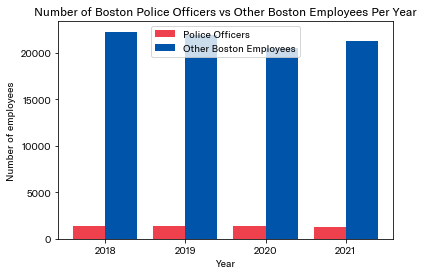

In [7]:
X = ['2018','2019','2020','2021']
num_officers_per_year = [num_officers_2018,num_officers_2019,num_officers_2020,num_officers_2021]
num_other_employees_per_year = [num_non_officer_employees_2018,num_non_officer_employees_2019,num_non_officer_employees_2020,num_non_officer_employees_2021]
  
X_axis = np.arange(len(X))

#csfont = {'fontname':'Century Schoolbook'}
  
plt.bar(X_axis - 0.2, num_officers_per_year, 0.4, label = 'Police Officers', color = '#ef404d')
plt.bar(X_axis + 0.2, num_other_employees_per_year, 0.4, label = 'Other Boston Employees', color = '#0055aa')

plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Number of employees")
plt
plt.title("Number of Boston Police Officers vs Other Boston Employees Per Year")
plt.legend(loc='upper center')
plt.show()

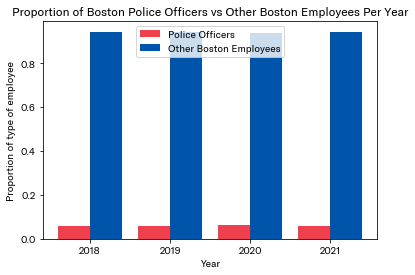

In [8]:
X = ['2018','2019','2020','2021']
num_officers_per_year = [prop_officers_2018,prop_officers_2019,prop_officers_2020,prop_officers_2021]
num_other_employees_per_year = [prop_non_2018,prop_non_2019,prop_non_2020,prop_non_2021]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, num_officers_per_year, 0.4, label = 'Police Officers', color = '#ef404d')
plt.bar(X_axis + 0.2, num_other_employees_per_year, 0.4, label = 'Other Boston Employees', color = '#0055aa')

plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Proportion of type of employee")
plt.title("Proportion of Boston Police Officers vs Other Boston Employees Per Year")
plt.legend(loc='upper center')
plt.show()

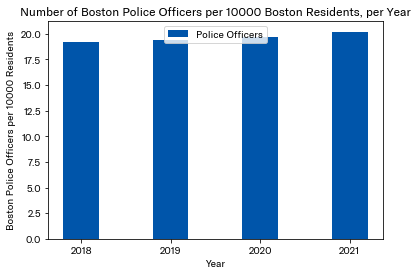

In [9]:
#https://www.populationu.com/cities/boston-population
#boston population per year
#pop_2021 = 683822
#pop_2020 = 675647
#pop_2019 = 692600
#pop_2018 = 694583

#better numbers, taken from:
#https://data.census.gov/table?q=population+Boston+2018&tid=ACSDP1Y2018.DP05
#USING AMERICAN COMMUNITY SURVEY NUMBERS
#boston pop per year, THIS IS USED NOW

pop_2021 = 654281
pop_2020 = 689326
pop_2019 = 694295
pop_2018 = 695926

#police officers per 10000:
police_per_10k_2021 = 10000 * num_officers_2021/pop_2021
police_per_10k_2020 = 10000 * num_officers_2020/pop_2020
police_per_10k_2019 = 10000 * num_officers_2019/pop_2019
police_per_10k_2018 = 10000 * num_officers_2018/pop_2018

police_per_10k_list = [police_per_10k_2018,police_per_10k_2019,police_per_10k_2020,police_per_10k_2021]

plt.bar(X_axis, police_per_10k_list, 0.4, label = 'Police Officers', color = '#0055aa')

plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Boston Police Officers per 10000 Residents")
plt.title("Number of Boston Police Officers per 10000 Boston Residents, per Year")
plt.legend(loc='upper center')
plt.show()

In [10]:
test = df[df['REGULAR'].isnull()]
test1 = test[test['INJURED'].notnull()]
test1

test2 = df[df['RETRO'].notnull()]
test2[test2['TITLE'] == 'Police Officer']

test3 = test[test['OTHER'].notnull()]
test3

all_officers_2021 = df[df['TITLE'] == 'Police Officer']

not_regular_2021 = all_officers_2021[all_officers_2021['REGULAR'].isnull()]
regular_2021 = all_officers_2021[all_officers_2021['REGULAR'].notnull()]

not_reg_not_other_2021 = not_regular_2021[not_regular_2021['OTHER'].isnull()]
not_reg_other_2021 = not_regular_2021[not_regular_2021['OTHER'].notnull()]

not_reg_other_not_injured_2021 = not_reg_other_2021[not_reg_other_2021['INJURED'].isnull()]
not_reg_other_injured_2021 = not_reg_other_2021[not_reg_other_2021['INJURED'].notnull()]

not_reg_not_other_injured_2021 = not_reg_not_other_2021[not_reg_not_other_2021['INJURED'].notnull()]

not_reg_not_other_not_injured_2021 = not_reg_not_other_2021[not_reg_not_other_2021['INJURED'].isnull()]

total_regular_2021 = len(regular_2021)

total_off_2021 = len(all_officers_2021)

total_only_other_2021 = len(not_reg_other_not_injured_2021)

total_other_and_injured_2021 = len(not_reg_other_injured_2021)

total_only_injured_2021 = len(not_reg_not_other_injured_2021)

In [11]:
df_2020[' REGULAR ']

0         $145,787.56 
1         $108,803.25 
2         $132,699.44 
3         $162,770.15 
4         $132,699.44 
             ...      
21853           $1.52 
21854           $0.38 
21855           $0.38 
21856           $0.38 
21857           $0.38 
Name:  REGULAR , Length: 21858, dtype: object

In [12]:
all_officers_2020 = df_2020[df_2020['TITLE'] == 'Police Officer']

not_regular_2020 = all_officers_2020[all_officers_2020[' REGULAR '].isnull()]
regular_2020 = all_officers_2020[all_officers_2020[' REGULAR '].notnull()]

not_reg_not_other_2020 = not_regular_2020[not_regular_2020[' OTHER '].isnull()]
not_reg_other_2020 = not_regular_2020[not_regular_2020[' OTHER '].notnull()]

not_reg_other_not_injured_2020 = not_reg_other_2020[not_reg_other_2020[' INJURED '].isnull()]
not_reg_other_injured_2020 = not_reg_other_2020[not_reg_other_2020[' INJURED '].notnull()]

not_reg_not_other_injured_2020 = not_reg_not_other_2020[not_reg_not_other_2020[' INJURED '].notnull()]

not_reg_not_other_not_injured_2020 = not_reg_not_other_2020[not_reg_not_other_2020[' INJURED '].isnull()]

total_regular_2020 = len(regular_2020)

total_off_2020 = len(all_officers_2020)

total_only_other_2020 = len(not_reg_other_not_injured_2020)

total_other_and_injured_2020 = len(not_reg_other_injured_2020)

total_only_injured_2020 = len(not_reg_not_other_injured_2020)

In [13]:
all_officers_2019 = df_2019[df_2019['TITLE'] == 'Police Officer']

not_regular_2019 = all_officers_2019[all_officers_2019[' REGULAR '].isnull()]
regular_2019 = all_officers_2019[all_officers_2019[' REGULAR '].notnull()]

not_reg_not_other_2019 = not_regular_2019[not_regular_2019[' OTHER '].isnull()]
not_reg_other_2019 = not_regular_2019[not_regular_2019[' OTHER '].notnull()]

not_reg_other_not_injured_2019 = not_reg_other_2019[not_reg_other_2019[' INJURED '].isnull()]
not_reg_other_injured_2019 = not_reg_other_2019[not_reg_other_2019[' INJURED '].notnull()]

not_reg_not_other_injured_2019 = not_reg_not_other_2019[not_reg_not_other_2019[' INJURED '].notnull()]

not_reg_not_other_not_injured_2019 = not_reg_not_other_2019[not_reg_not_other_2019[' INJURED '].isnull()]

total_regular_2019 = len(regular_2019)

total_off_2019 = len(all_officers_2019)

total_only_other_2019 = len(not_reg_other_not_injured_2019)

total_other_and_injured_2019 = len(not_reg_other_injured_2019)

total_only_injured_2019 = len(not_reg_not_other_injured_2019)

In [14]:
all_officers_2018 = df_2018[df_2018['TITLE'] == 'Police Officer']

not_regular_2018 = all_officers_2018[all_officers_2018['REGULAR'].isnull()]
regular_2018 = all_officers_2018[all_officers_2018['REGULAR'].notnull()]

not_reg_not_other_2018 = not_regular_2018[not_regular_2018['OTHER'].isnull()]
not_reg_other_2018 = not_regular_2018[not_regular_2018['OTHER'].notnull()]

not_reg_other_not_injured_2018 = not_reg_other_2018[not_reg_other_2018['INJURED'].isnull()]
not_reg_other_injured_2018 = not_reg_other_2018[not_reg_other_2018['INJURED'].notnull()]

not_reg_not_other_injured_2018 = not_reg_not_other_2018[not_reg_not_other_2018['INJURED'].notnull()]

not_reg_not_other_not_injured_2018 = not_reg_not_other_2018[not_reg_not_other_2018['INJURED'].isnull()]

total_regular_2018 = len(regular_2018)

total_off_2018 = len(all_officers_2018)

total_only_other_2018 = len(not_reg_other_not_injured_2018)

total_other_and_injured_2018 = len(not_reg_other_injured_2018)

total_only_injured_2018 = len(not_reg_not_other_injured_2018)

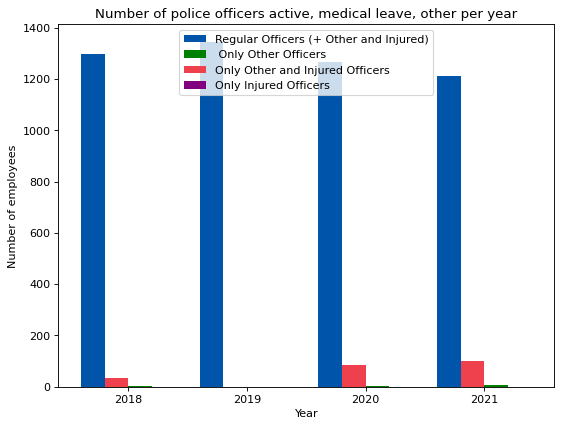

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

X = ['2018','2019','2020','2021']

num_all = [total_off_2018,total_off_2019,total_off_2020,total_off_2021]

num_reg = [total_regular_2018,total_regular_2019,total_regular_2020,total_regular_2021]

num_only_other = [total_only_other_2018,total_only_other_2019,total_only_other_2020,total_only_other_2021]

num_other_and_injured = [total_other_and_injured_2018,total_other_and_injured_2019,total_other_and_injured_2020,total_other_and_injured_2021]

num_only_injured = [total_only_injured_2018,total_only_injured_2019,total_only_injured_2020,total_only_injured_2021]



X_axis = np.arange(len(X))
  
    
plt.bar(X_axis - 0.3, num_reg, 0.2, label = 'Regular Officers (+ Other and Injured)', color = '#0055aa')
plt.bar(X_axis + 0.1, num_only_other, 0.2, label = ' Only Other Officers', color = 'green')
plt.bar(X_axis - 0.1, num_other_and_injured, 0.2, label = 'Only Other and Injured Officers', color = '#ef404d')
plt.bar(X_axis + 0.3, num_only_injured, 0.2, label = 'Only Injured Officers', color = 'purple')

plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Number of employees")
plt.title("Number of police officers active, medical leave, other per year")
plt.legend(loc='upper center')
plt.show()

In [3]:
crime_data_2022 = pd.read_csv('crime-incident-reports-2022.csv', encoding = "ISO-8859-1")
crime_data_2021 = pd.read_csv('crime-incident-reports-2021.csv', encoding = "ISO-8859-1")
crime_data_2020 = pd.read_csv('crime-incident-reports-2020.csv', encoding = "ISO-8859-1")
crime_data_2019 = pd.read_csv('crime-incident-reports-2019.csv', encoding = "ISO-8859-1")
crime_data_2018 = pd.read_csv('crime-incident-reports-2018.csv', encoding = "ISO-8859-1")

C:\Users\ANTON_~1\AppData\Local\Temp/ipykernel_7768/2321379910.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data_2022 = pd.read_csv('crime-incident-reports-2022.csv', encoding = "ISO-8859-1")
C:\Users\ANTON_~1\AppData\Local\Temp/ipykernel_7768/2321379910.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data_2021 = pd.read_csv('crime-incident-reports-2021.csv', encoding = "ISO-8859-1")
C:\Users\ANTON_~1\AppData\Local\Temp/ipykernel_7768/2321379910.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data_2020 = pd.read_csv('crime-incident-reports-2020.csv', encoding = "ISO-8859-1")
C:\Users\ANTON_~1\AppData\Local\Temp/ipykernel_7768/2321379910.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data_2019 = pd.read_csv('crime-incident-

In [4]:
crime_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,S87066666,3301,NaN,VERBAL DISPUTE,B2,300,0,2022-04-07 19:30:00,2022,4,Thursday,19,NaN,THORNTON PLACE,0.000000,0.000000,"(0, 0)"
1,225520077,3115,NaN,INVESTIGATE PERSON,D14,786,0,2022-02-02 00:00:00,2022,2,Wednesday,0,NaN,WASHINGTON ST,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)"
2,222934485,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,319,0,2022-05-14 20:50:00,2022,5,Saturday,20,NaN,BLUE HILL AVE,42.308038,-71.083592,"(42.30803768051951, -71.08359213073199)"
3,222924960,3301,NaN,VERBAL DISPUTE,C11,355,0,2022-04-09 16:30:00,2022,4,Saturday,16,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)"
4,222879787,3207,NaN,PROPERTY - FOUND,D4,167,0,2022-11-19 13:50:00,2022,11,Saturday,13,NaN,HARRISON AVE,0.000000,0.000000,"(0, 0)"


In [4]:
crime_data_2018 = crime_data_2018.dropna(subset=['Lat','Long'])
crime_data_2019 = crime_data_2019.dropna(subset=['Lat','Long'])
crime_data_2020 = crime_data_2020.dropna(subset=['Lat','Long'])
crime_data_2021 = crime_data_2021.dropna(subset=['Lat','Long'])
crime_data_2022 = crime_data_2022.dropna(subset=['Lat','Long'])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (4,).

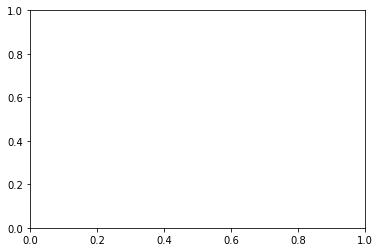

In [33]:
all_officers_2021_grouped = all_officers_2021.groupby(['POSTAL']).agg('count')
all_officers_2021_grouped

top3nums = all_officers_2021_grouped.nlargest(n=3, columns=['NAME'])
top3nums = all_officers_2021_grouped.nlargest(n=3, columns=['NAME'])
#top3nums

#all_officers_2021_1 = all_officers_2021[all_officers_2021['POSTAL'] == '02136']
#all_officers_2021_1

#02136	180	180	180	163	0	170	158	58	120	70	180
#02132	179	179	179	172	0	166	166	53	115	98	179
#02124	

top3 = ['02136', '02132', '02124']
top3counts = [180, 179, 145]

X_axis = np.arange(len(top3))
  
    
plt.bar(X_axis - 0.3, num_reg, 0.2, label = 'Regular Officers (+ Other and Injured)', color = '#0055aa')
plt.bar(X_axis + 0.1, num_only_other, 0.2, label = ' Only Other Officers', color = 'green')
plt.bar(X_axis - 0.1, num_other_and_injured, 0.2, label = 'Only Other and Injured Officers', color = '#ef404d')

plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Number of employees")
plt.title("Number of police officers active, medical leave, other per year")
plt.legend(loc='upper center')
plt.show()

In [13]:
initial_map = folium.Map(location=[42.3601, -71.0589])

crime_data_2022['Lat'] = crime_data_2022['Lat'].astype(float)
crime_data_2022['Long'] = crime_data_2022['Long'].astype(float)
#crime_data['price'] = crime_data['price'].astype(float)

#heat_df = pd.read_csv('listings.csv', dtype=object)

#heat_df['latitude'] = heat_df['latitude'].astype(float)
#heat_df['longitude'] = heat_df['longitude'].astype(float)
#heat_df['price'] = heat_df['price'].astype(float)

crime_data_only_locations = crime_data_2022[['Lat', 'Long']]
crime_data_only_locations = crime_data_only_locations.dropna(axis=0, subset=['Lat','Long'])

#agg_functions = {'price': 'mean'}

#heat_df = heat_df.groupby(['latitude','longitude']).aggregate(agg_functions)
#heat_df = heat_df.reset_index()

heat_data = [[row['Lat'],row['Long']] for index, row in crime_data_only_locations.iterrows()]

HeatMap(heat_data, min_opacity=0.2).add_to(initial_map)

initial_map.save("crime_heatmap_2022.html")

In [14]:
initial_map = folium.Map(location=[42.3601, -71.0589])

crime_data_2021['Lat'] = crime_data_2021['Lat'].astype(float)
crime_data_2021['Long'] = crime_data_2021['Long'].astype(float)
#crime_data['price'] = crime_data['price'].astype(float)

#heat_df = pd.read_csv('listings.csv', dtype=object)

#heat_df['latitude'] = heat_df['latitude'].astype(float)
#heat_df['longitude'] = heat_df['longitude'].astype(float)
#heat_df['price'] = heat_df['price'].astype(float)

crime_data_only_locations = crime_data_2021[['Lat', 'Long']]
crime_data_only_locations = crime_data_only_locations.dropna(axis=0, subset=['Lat','Long'])

#agg_functions = {'price': 'mean'}

#heat_df = heat_df.groupby(['latitude','longitude']).aggregate(agg_functions)
#heat_df = heat_df.reset_index()

heat_data = [[row['Lat'],row['Long']] for index, row in crime_data_only_locations.iterrows()]

HeatMap(heat_data, min_opacity=0.2).add_to(initial_map)

initial_map.save("crime_heatmap_2021.html")

In [15]:
initial_map = folium.Map(location=[42.3601, -71.0589])

crime_data_2020['Lat'] = crime_data_2020['Lat'].astype(float)
crime_data_2020['Long'] = crime_data_2020['Long'].astype(float)
#crime_data['price'] = crime_data['price'].astype(float)

#heat_df = pd.read_csv('listings.csv', dtype=object)

#heat_df['latitude'] = heat_df['latitude'].astype(float)
#heat_df['longitude'] = heat_df['longitude'].astype(float)
#heat_df['price'] = heat_df['price'].astype(float)

crime_data_only_locations = crime_data_2020[['Lat', 'Long']]
crime_data_only_locations = crime_data_only_locations.dropna(axis=0, subset=['Lat','Long'])

#agg_functions = {'price': 'mean'}

#heat_df = heat_df.groupby(['latitude','longitude']).aggregate(agg_functions)
#heat_df = heat_df.reset_index()

heat_data = [[row['Lat'],row['Long']] for index, row in crime_data_only_locations.iterrows()]

HeatMap(heat_data, min_opacity=0.2).add_to(initial_map)

initial_map.save("crime_heatmap_2020.html")

In [16]:
initial_map = folium.Map(location=[42.3601, -71.0589])

crime_data_2019['Lat'] = crime_data_2019['Lat'].astype(float)
crime_data_2019['Long'] = crime_data_2019['Long'].astype(float)
#crime_data['price'] = crime_data['price'].astype(float)

#heat_df = pd.read_csv('listings.csv', dtype=object)

#heat_df['latitude'] = heat_df['latitude'].astype(float)
#heat_df['longitude'] = heat_df['longitude'].astype(float)
#heat_df['price'] = heat_df['price'].astype(float)

crime_data_only_locations = crime_data_2019[['Lat', 'Long']]
crime_data_only_locations = crime_data_only_locations.dropna(axis=0, subset=['Lat','Long'])

#agg_functions = {'price': 'mean'}

#heat_df = heat_df.groupby(['latitude','longitude']).aggregate(agg_functions)
#heat_df = heat_df.reset_index()

heat_data = [[row['Lat'],row['Long']] for index, row in crime_data_only_locations.iterrows()]

HeatMap(heat_data, min_opacity=0.2).add_to(initial_map)

initial_map.save("crime_heatmap_2019.html")

In [17]:
initial_map = folium.Map(location=[42.3601, -71.0589])

crime_data_2018['Lat'] = crime_data_2018['Lat'].astype(float)
crime_data_2018['Long'] = crime_data_2018['Long'].astype(float)
#crime_data['price'] = crime_data['price'].astype(float)

#heat_df = pd.read_csv('listings.csv', dtype=object)

#heat_df['latitude'] = heat_df['latitude'].astype(float)
#heat_df['longitude'] = heat_df['longitude'].astype(float)
#heat_df['price'] = heat_df['price'].astype(float)

crime_data_only_locations = crime_data_2018[['Lat', 'Long']]
crime_data_only_locations = crime_data_only_locations.dropna(axis=0, subset=['Lat','Long'])

#agg_functions = {'price': 'mean'}

#heat_df = heat_df.groupby(['latitude','longitude']).aggregate(agg_functions)
#heat_df = heat_df.reset_index()

heat_data = [[row['Lat'],row['Long']] for index, row in crime_data_only_locations.iterrows()]

HeatMap(heat_data, min_opacity=0.2).add_to(initial_map)

initial_map.save("crime_heatmap_2018.html")

In [6]:
import geopy
#def get_zipcode(df, geolocator, lat_field, lon_field):
    #location = geolocator.reverse((df[lat_field], df[lon_field]))
    #return location.raw['address']['postcode']

def get_zipcode(geolocator, lat_field, lon_field):
    #location = geolocator.reverse((df[lat_field], df[lon_field]))
    #return location.raw['address']['postcode']
    return geolocator.reverse((lat_field, lon_field))
    
geolocator = geopy.Nominatim(user_agent='test')
    
get_zipcode(geolocator, 42.34308127134165, -71.14172267328729).raw['address']['postcode']

#crime_data_only_locations['Lat']

'02447'

In [20]:
crime_data_only_locations_with_loc = crime_data_only_locations[crime_data_only_locations['Lat'] != 0]
crime_data_only_locations_with_loc = crime_data_only_locations_with_loc[crime_data_only_locations_with_loc['Long'] != 0]

In [21]:
crime_data_only_locations_with_loc_nan = crime_data_only_locations_with_loc[crime_data_only_locations_with_loc['Lat'].isnull()]
crime_data_only_locations_with_loc_nan

#THERE ARE NO NANS

,Lat,Long


In [5]:
crime_data_2022 = crime_data_2022[crime_data_2022['Lat'] != 0]
crime_data_2022 = crime_data_2022[crime_data_2022['Long'] != 0]
crime_data_2021 = crime_data_2021[crime_data_2021['Lat'] != 0]
crime_data_2021 = crime_data_2021[crime_data_2021['Long'] != 0]
crime_data_2020 = crime_data_2020[crime_data_2020['Lat'] != 0]
crime_data_2020 = crime_data_2020[crime_data_2020['Long'] != 0]
crime_data_2019 = crime_data_2019[crime_data_2019['Lat'] != 0]
crime_data_2019 = crime_data_2019[crime_data_2019['Long'] != 0]
crime_data_2018 = crime_data_2018[crime_data_2018['Lat'] != 0]
crime_data_2018 = crime_data_2018[crime_data_2018['Long'] != 0]

In [20]:
crime_data_only_locations_with_loc_nan = crime_data_2022[crime_data_2022['Long'].isnull()]
crime_data_only_locations_with_loc_nan

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location


In [7]:
#crime_data_only_locations['POSTAL'] = get_zipcode(geolocator, crime_data_only_locations['Lat'], crime_data_only_locations['Long']).raw['address']['postcode']

def get_postal(row):
    #print(row[])
    #return get_zipcode(geolocator, row['Lat'], row['Long']).raw['address']
    try:
        ret_val = get_zipcode(geolocator, row['Lat'], row['Long']).raw['address']['postcode']
        return ret_val
    except:
        return None
    #return get_zipcode(geolocator, row['Lat'], row['Long']).raw['address']['postcode']
    
#some_data = crime_data_2022[:90].copy()
#some_data
#some_data['POSTAL'] = some_data.apply(get_postal, axis=1)

#crime_data_only_locations['POSTAL'] = crime_data_only_locations.apply(get_postal, axis=1)


In [22]:
some_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,POSTAL
1,225520077,3115,NaN,INVESTIGATE PERSON,D14,786,0,2022-02-02 00:00:00,2022,2,Wednesday,0,NaN,WASHINGTON ST,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)",02447
2,222934485,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,319,0,2022-05-14 20:50:00,2022,5,Saturday,20,NaN,BLUE HILL AVE,42.308038,-71.083592,"(42.30803768051951, -71.08359213073199)",02121
3,222924960,3301,NaN,VERBAL DISPUTE,C11,355,0,2022-04-09 16:30:00,2022,4,Saturday,16,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)",02122
6,222648862,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022-02-05 18:25:00,2022,2,Saturday,18,NaN,WASHINGTON ST,42.329748,-71.084540,"(42.329748204791635, -71.08454011649543)",02119
7,222587590,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,312,0,2022-06-24 18:30:00,2022,6,Friday,18,NaN,HOLWORTHY ST,42.316779,-71.090890,"(42.316779499798706, -71.09089034409136)",02119


In [ ]:
crimezips_2022 = []
for index, row in crime_data_2022.iterrows():
    if index == 20:
        break
    cur_zip = get_postal(row)
    crimezips_2022.append(cur_zip)

In [9]:
print(len(crime_data_2022))

62301


In [8]:
test_data = crime_data_2018[:100]
crimezips_2022 = []
for index, row in test_data.iterrows():
    cur_zip = get_postal(row)
    crimezips_2022.append(cur_zip)
    if len(crimezips_2022) % 10 == 0:
        print(len(crimezips_2022))

10
20
30
40
50
60
70
80
90
100


In [ ]:
crime_data_2022['POSTAL'] = crime_data_2022.apply(get_postal, axis=1)

In [ ]:
crime_data_only_locations_with_loc_zip.head()

In [34]:
all_officers_2021_grouped

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS
POSTAL,,,,,,,,,,,
01501,1,1,1,1,0,1,1,0,0,1,1
01545,1,1,1,1,0,1,1,0,1,0,1
01721,1,1,1,0,0,1,0,1,0,0,1
01730,1,1,1,0,0,1,0,1,0,1,1
01742,1,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
03561,1,1,1,1,0,1,1,0,1,1,1
03851,1,1,1,1,0,1,0,1,0,1,1
03909,1,1,1,0,0,1,0,1,0,1,1


In [3]:
fio_21 = pd.read_csv('fio_2021-2.csv', encoding = "ISO-8859-1")

In [16]:
fio_21.head()

,ï»¿fc_num,contact_date,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,zip,...,basis,vehicle_year,vehicle_state,vehicle_model,vehicle_color,vehicle_style,vehicle_type,key_situations,contact_reason,weather
0,FC21000001,2021-01-01 09:17:00,144459,"LINNANE, BRENDAN",11586,CHRISTOPHER CARROLL,MASSACHUSETTS AVE,BOSTON,MA,2115,...,Probable Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Officers responded to a larceny in progress at...,NaN
1,FC21000004,2021-01-01 14:42:00,144459,"LINNANE, BRENDAN",11586,CHRISTOPHER CARROLL,YARMOUTH ST,BOSTON,MA,2116,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Officers responded to 1 Ring Rd. for a radio c...,NaN
2,FC21000003,2021-01-01 14:46:00,153131,"CAMPOT, JOSEPH",11586,CHRISTOPHER CARROLL,NaN,BOSTON,MA,2116,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 2:46pm on Friday 01/01/21, Officers Camp...",NaN
3,FC21000007,2021-01-01 18:08:00,148319,"KEARNEY, PHILIP",99798,DERRICK LEVY,NaN,BOSTON,MA,2120,...,Probable Cause,2004.0,MA,Accord,White,"4 Door, Sedan",Passenger Car/ Automobile,NaN,"T/S for defective taillights. \n\nOperatorXXX,...",NaN
4,FC21000006,2021-01-01 20:35:00,157658,"POLITSOPOULOS, NICHOLAS",11586,CHRISTOPHER CARROLL,COLUMBUS AVE,BOSTON,MA,2116,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 8:35 PM on Friday January 1, 2021 office...",NaN


In [4]:
fio_21['zip'].head()

0    2115
1    2116
2    2116
3    2120
4    2116
Name: zip, dtype: int64

In [15]:
fio_21.zip.value_counts()

2118     843
2124     460
2119     427
2121     390
2125     332
2116     271
2122     227
2130     165
2126     158
2115     128
2111     124
2127     113
2120     103
2215     102
2108      96
2135      91
2128      82
2109      58
2114      57
2134      57
2131      55
2136      53
2110      52
2199      31
2129      27
2132      23
2113      21
2210       8
2203       5
2467       3
2169       2
2446       2
2368       1
2474       1
2186       1
1810       1
7032       1
2145       1
2148       1
99999      1
2780       1
2201       1
2146       1
1902       1
2721       1
2453       1
2465       1
2024       1
Name: zip, dtype: int64

In [5]:
fio_21_grouped_postal = fio_21.groupby(['zip'], as_index=False).agg('count')

In [6]:
fio_21_grouped_postal.head()

,zip,ï»¿fc_num,contact_date,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,...,basis,vehicle_year,vehicle_state,vehicle_model,vehicle_color,vehicle_style,vehicle_type,key_situations,contact_reason,weather
0,1810,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
1,1902,1,1,1,1,1,1,1,1,1,...,1,1,0,1,0,0,1,0,1,0
2,2024,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
3,2108,96,96,96,96,96,96,71,96,96,...,96,11,11,11,11,10,11,0,96,0
4,2109,58,58,58,58,58,58,35,58,58,...,58,23,23,23,23,15,23,0,58,0


In [43]:
def get_float(row):
    #print(row[])
    #return get_zipcode(geolocator, row['Lat'], row['Long']).raw['address']
    try:
        ret_val = float(row['REGULAR'].replace(",",""))
        #print('hi')
        return ret_val
    except:
        #print(row['REGULAR'])
        return None
    

In [61]:
#float()
all_officers_2021['TOTAL_GROSS'] = all_officers_2021['TOTAL_GROSS'].replace('[\$,]', '', regex=True).astype(float)

C:\Users\ANTON_~1\AppData\Local\Temp/ipykernel_12584/4258784281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_officers_2021['TOTAL_GROSS'] = all_officers_2021['TOTAL_GROSS'].replace('[\$,]', '', regex=True).astype(float)


In [115]:
all_officers_2021['OVERTIME'] = all_officers_2021['OVERTIME'].replace('[\$,]', '', regex=True).astype(float)

C:\Users\ANTON_~1\AppData\Local\Temp/ipykernel_12584/880317375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_officers_2021['OVERTIME'] = all_officers_2021['OVERTIME'].replace('[\$,]', '', regex=True).astype(float)


In [109]:
#type(all_officers_2021['OVERTIME'][0])


float

In [113]:
#all_officers_2021.head()
print(type(all_officers_2021['OVERTIME'][0]))

<class 'float'>


In [64]:
agg_functions = {'TOTAL_GROSS': 'mean'}
#all_officers_2021['REGULAR'] = all_officers_2021.apply(get_float, axis=1)
#heat_df_norm_minmax = heat_df_norm_minmax.groupby(['latitude','longitude']).aggregate(agg_functions)

all_officers_2021_grouped_count = all_officers_2021.groupby(['POSTAL']).agg('count')
all_officers_2021_grouped_reg = all_officers_2021.groupby(['POSTAL']).aggregate(agg_functions)

#top3nums = all_officers_2021_grouped.nlargest(n=3, columns=['NAME'])
#top3nums = all_officers_2021_grouped.nlargest(n=3, columns=['NAME'])
#top3nums

In [116]:
agg_functions2 = {'OVERTIME': 'mean'}
all_officers_2021_grouped_reg = all_officers_2021.groupby(['POSTAL']).aggregate(agg_functions2)

In [72]:
all_officers_2021_grouped_count
top5counts = all_officers_2021_grouped_count.nlargest(n=5, columns=['NAME'])
top5counts

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS
POSTAL,,,,,,,,,,,
02136,180,180,180,163,0,170,158,58,120,70,180
02132,179,179,179,172,0,166,166,53,115,98,179
02124,145,145,145,139,0,136,132,41,103,59,145
02122,123,123,123,116,0,116,113,34,90,56,123
02131,76,76,76,74,0,70,73,21,53,32,76


In [118]:
all_officers_2021_grouped_reg.head()
top5gross = all_officers_2021_grouped_reg.nlargest(n=5, columns=['OVERTIME'])
top5gross

,OVERTIME
POSTAL,
01835,89448.01
02170,86826.60
02139,82056.55
03561,81580.05
02726,72287.70


In [75]:
list(top5gross.index.values) 

['02472', '02466', '02139', '03561', '02379']

In [76]:
top5count_postal = list(top5counts.index.values) 
top5count_count = top5counts['NAME'].tolist()
top5gross_postal = list(top5gross.index.values) 
top5gross_gross = top5gross['TOTAL_GROSS'].tolist()

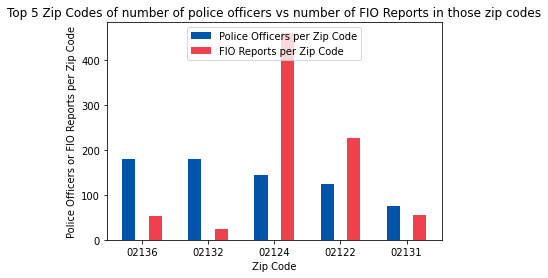

In [103]:
#police_per_10k_list = [police_per_10k_2018,police_per_10k_2019,police_per_10k_2020,police_per_10k_2021]

X_axis = np.arange(len(top5count_postal))
  
#plt.bar(X_axis - 0.2, num_officers_per_year, 0.4, label = 'Police Officers', color = '#ef404d')
#plt.bar(X_axis + 0.2, num_other_employees_per_year, 0.4, label = 'Other Boston Employees', color = '#0055aa')

plt.bar(X_axis - 0.2, top5count_count, 0.2, label = 'Police Officers per Zip Code', color = '#0055aa')
plt.bar(X_axis + 0.2, [53, 23, 460, 227, 55], 0.2, label = 'FIO Reports per Zip Code', color = '#ef404d')

plt.xticks(X_axis, top5count_postal)

#plt.xticks(X_axis, X)
plt.xlabel("Zip Code")
plt.ylabel("Police Officers or FIO Reports per Zip Code")
plt.title("Top 5 Zip Codes of number of police officers vs number of FIO Reports in those zip codes")
plt.legend(loc='upper center')
plt.show()

In [86]:
fio_21_grouped_postal_spec = fio_21_grouped_postal[(fio_21_grouped_postal['zip'] == 2136) | 
                                                   (fio_21_grouped_postal['zip'] == 2132) |
                                                   (fio_21_grouped_postal['zip'] == 2124) |
                                                   (fio_21_grouped_postal['zip'] == 2122) |
                                                   (fio_21_grouped_postal['zip'] == 2131)]

#top 5 by count: [02136, 02132, 02124, 02122, 02131]
#top 5 by gross avg: [02136, 02132, 02124, 02122]

In [92]:
fio_21_grouped_postal_spec

,zip,ï»¿fc_num,contact_date,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,...,basis,vehicle_year,vehicle_state,vehicle_model,vehicle_color,vehicle_style,vehicle_type,key_situations,contact_reason,weather
15,2122,227,227,227,227,227,227,159,227,227,...,226,96,96,100,100,88,100,0,227,0
16,2124,460,460,460,460,460,460,289,460,460,...,459,289,274,304,298,284,304,0,460,0
23,2131,55,55,55,55,55,55,39,55,55,...,55,31,30,32,31,25,32,0,55,0
24,2132,23,23,23,23,23,23,17,23,23,...,23,8,8,8,8,7,8,0,23,0
27,2136,53,53,53,53,53,53,40,53,53,...,53,32,33,33,33,25,33,0,53,0


In [ ]:
top5_count_fio = [53, 23, 460, 227, 55]

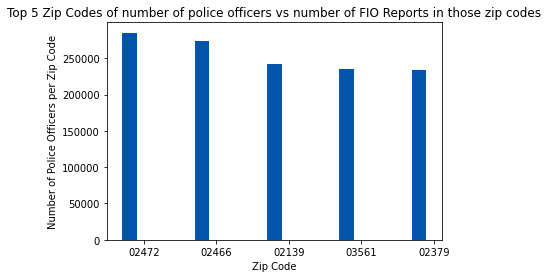

In [97]:
#police_per_10k_list = [police_per_10k_2018,police_per_10k_2019,police_per_10k_2020,police_per_10k_2021]

X_axis = np.arange(len(top5gross_postal))

plt.bar(X_axis - 0.2, top5gross_gross, 0.2, label = 'Police Officers per Zip Code', color = '#0055aa')
plt.bar(X_axis + 0.2, [53, 23, 460, 227, 55], 0.2, label = 'FIO Reports per Zip Code', color = '#ef404d')

plt.xticks(X_axis, top5gross_postal)

#plt.xticks(X_axis, X)
plt.xlabel("Zip Code")
plt.ylabel("Number of Police Officers per Zip Code")
plt.title("Top 5 Zip Codes of number of police officers vs number of FIO Reports in those zip codes")
plt.legend(loc='upper center')
plt.show()

In [100]:
fio_21_grouped_postal_spec_gross = fio_21_grouped_postal[(fio_21_grouped_postal['zip'] == 2136) | 
                                                   (fio_21_grouped_postal['zip'] == 2466) |
                                                   (fio_21_grouped_postal['zip'] == 2139) |
                                                   (fio_21_grouped_postal['zip'] == 3561) |
                                                   (fio_21_grouped_postal['zip'] == 2379)]

#top 5 by count: [02136, 02132, 02124, 02122, 02131]
#top 5 by gross avg: [02472, 02466, 02139, 03561, 02379]

In [101]:
fio_21_grouped_postal_spec_gross

,zip,ï»¿fc_num,contact_date,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,...,basis,vehicle_year,vehicle_state,vehicle_model,vehicle_color,vehicle_style,vehicle_type,key_situations,contact_reason,weather
27,2136,53,53,53,53,53,53,40,53,53,...,53,32,33,33,33,25,33,0,53,0


In [124]:
fio_21[fio_21['zip'] == 2136]

,ï»¿fc_num,contact_date,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,zip,...,basis,vehicle_year,vehicle_state,vehicle_model,vehicle_color,vehicle_style,vehicle_type,key_situations,contact_reason,weather
43,FC21000054,2021-01-04 17:00:00,144840,"DIPIRO, MATTHEW",9805,JOHN TEVNAN,NaN,HYDE PARK,MA,2136,...,Probable Cause,2012.0,MA,528I,Black,"4 Door, Sedan",Passenger Car/ Automobile,NaN,Officers stopped MA Reg. XXXfor Val's in the a...,NaN
83,FC21000086,2021-01-06 20:47:00,144840,"DIPIRO, MATTHEW",11171,ROBERT DONARUMA,GARFIELD AVE,HYDE PARK,MA,2136,...,Probable Cause,2007.0,MA,Galant,White,"4 Door, Sedan",Passenger Car/ Automobile,NaN,Officers stopped MA Reg. XXXafter locating it ...,NaN
84,FC21000087,2021-01-06 21:00:00,144840,"DIPIRO, MATTHEW",11171,ROBERT DONARUMA,GARFIELD AVE,HYDE PARK,MA,2136,...,Intel,2018.0,MA,Civic,White,Sedan,Passenger Car/ Automobile,NaN,Officers observed XXXand XXX in a group of 5-7...,NaN
220,FC21000226,2021-01-23 22:00:00,148284,"MCNULTY, MICHAEL",9971,MICHAEL FELTON,NaN,BOSTON,MA,2136,...,Intel,2006.0,MA,Altima,White,"4 Door, Sedan",Passenger Car/ Automobile,NaN,About 10:00pm on Saturday 1/23/21 Officers obs...,NaN
282,FC21000407,2021-01-29 02:00:00,102943,"DELAROSA, JOSHUA",9805,JOHN TEVNAN,RIVER ST,HYDE PARK,MA,2136,...,Encounter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Officers De La Rosa and DePinho, while conduct...",NaN
429,FC21000551,2021-02-13 17:00:00,144840,"DIPIRO, MATTHEW",12259,DAVID EDWARDS,HILLIS RD,HYDE PARK,MA,2136,...,Intel,2017.0,MA,Accord,White,"4 Door, Sedan",Passenger Car/ Automobile,NaN,Officers observed XXX (Active Fields Corner - ...,NaN
452,FC21000474,2021-02-15 10:00:00,080398,"LEWIS, DOWAYNE",9388,KEVIN WELSH,HYDE PARK AVE,HYDE PARK,MA,2136,...,Intel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 10:15am on Monday, 02/15/2021, Officer D...",NaN
481,FC21000524,2021-02-17 16:00:00,102943,"DELAROSA, JOSHUA",11171,ROBERT DONARUMA,DANA AVE,HYDE PARK,MA,2136,...,Encounter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XXX DOB XX/XX/XXXXreached out to the Street Ou...,NaN
521,FC21000546,2021-02-19 23:18:00,128849,"KAPLAN, ANDREAS",9971,MICHAEL FELTON,CENTRAL AVE,HYDE PARK,MA,2136,...,Encounter,2016.0,MA,Elantra,Gray,"4 Door, Sedan",Passenger Car/ Automobile,NaN,Officers received a radio call for an Unconsci...,NaN
537,FC21000562,2021-02-21 17:54:00,148284,"MCNULTY, MICHAEL",11171,ROBERT DONARUMA,WEST ST,HYDE PARK,MA,2136,...,Intel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Officer stopped a MV (FL REG XXXfor VALS at 33...,NaN


In [105]:
fio_21

,ï»¿fc_num,contact_date,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,zip,...,basis,vehicle_year,vehicle_state,vehicle_model,vehicle_color,vehicle_style,vehicle_type,key_situations,contact_reason,weather
0,FC21000001,2021-01-01 09:17:00,144459,"LINNANE, BRENDAN",11586,CHRISTOPHER CARROLL,MASSACHUSETTS AVE,BOSTON,MA,2115,...,Probable Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Officers responded to a larceny in progress at...,NaN
1,FC21000004,2021-01-01 14:42:00,144459,"LINNANE, BRENDAN",11586,CHRISTOPHER CARROLL,YARMOUTH ST,BOSTON,MA,2116,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Officers responded to 1 Ring Rd. for a radio c...,NaN
2,FC21000003,2021-01-01 14:46:00,153131,"CAMPOT, JOSEPH",11586,CHRISTOPHER CARROLL,NaN,BOSTON,MA,2116,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 2:46pm on Friday 01/01/21, Officers Camp...",NaN
3,FC21000007,2021-01-01 18:08:00,148319,"KEARNEY, PHILIP",99798,DERRICK LEVY,NaN,BOSTON,MA,2120,...,Probable Cause,2004.0,MA,Accord,White,"4 Door, Sedan",Passenger Car/ Automobile,NaN,"T/S for defective taillights. \n\nOperatorXXX,...",NaN
4,FC21000006,2021-01-01 20:35:00,157658,"POLITSOPOULOS, NICHOLAS",11586,CHRISTOPHER CARROLL,COLUMBUS AVE,BOSTON,MA,2116,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 8:35 PM on Friday January 1, 2021 office...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577,FC22000002,2021-12-31 01:30:00,162951,"Stone, Brandon",116944,CAVAN DUNN,COMMONWEALTH AVE,BOSTON,MA,2215,...,Probable Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 0130hrs on Friday, December 31, 2021, Of...",NaN
4578,FC21004867,2021-12-31 02:27:00,153078,"MONTERO, KEVIN",9021,THOMAS HOPKINS,E NEWTON ST,BOSTON,MA,2118,...,Reasonable Suspicion,2021.0,NY,OTHER: Escape,Black,"4 Door, Sedan",Passenger Car/ Automobile,NaN,Subject Stop 76 E Newton @02:27 hours\n\nOffic...,NaN
4579,FC21004867,2021-12-31 02:27:00,153078,"MONTERO, KEVIN",9021,THOMAS HOPKINS,E NEWTON ST,BOSTON,MA,2118,...,Intel,2021.0,NY,OTHER: Escape,Black,"4 Door, Sedan",Passenger Car/ Automobile,NaN,Subject Stop 76 E Newton @02:27 hours\n\nOffic...,NaN
4580,FC21004870,2021-12-31 18:33:00,118323,"FOLEY, ERIC",11212,MICHAEL MCCARTHY,NaN,DORCHESTER,MA,2124,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Officers responded to a r/c for a robbery in p...,NaN


In [11]:
#import geopandas

#points = geopandas.read_file('points.geojson')
#zipcodes = geopandas.read_file("USA_Zip_Code_Boundaries (1).lpk")
zipcodes = gpd.read_file("tl_2016_us_zcta510.shp")

#zip_points = points.sjoin(zipcodes, how='left', )

In [12]:
zipcodesexcerpt = zipcodes[:10]

In [9]:
zipcodes[zipcodes['ZCTA5CE10'] == '02135']['geometry']

10648    POLYGON ((-71.17440 42.35183, -71.17438 42.351...
Name: geometry, dtype: geometry

In [11]:
zipcodesexcerpt

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63411475,157689,+41.3183010,-083.6174935,"POLYGON ((-83.67446 41.33112, -83.67444 41.331..."
1,43452,43452,B5,G6350,S,121783676,13437380,+41.5157923,-082.9809454,"POLYGON ((-83.06775 41.53772, -83.06773 41.539..."
2,43456,43456,B5,G6350,S,9389362,999166,+41.6468445,-082.8226641,"MULTIPOLYGON (((-82.85660 41.68122, -82.85683 ..."
3,43457,43457,B5,G6350,S,48035540,0,+41.2673266,-083.4274645,"POLYGON ((-83.46747 41.26819, -83.46760 41.268..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532..."
5,43460,43460,B5,G6350,S,7158544,791729,+41.6011920,-083.5649985,"POLYGON ((-83.57663 41.60105, -83.57753 41.601..."
6,43462,43462,B5,G6350,S,66526720,65743,+41.2837850,-083.7228646,"POLYGON ((-83.78598 41.29924, -83.78641 41.299..."
7,43463,43463,B5,G6350,S,19415,0,+41.5086650,-083.5080344,"POLYGON ((-83.50845 41.50923, -83.50784 41.510..."
8,43464,43464,B5,G6350,S,86139720,12290475,+41.4048795,-082.9241092,"POLYGON ((-82.95294 41.43017, -82.90308 41.430..."
9,43465,43465,B5,G6350,S,28559487,101977,+41.5654721,-083.5003020,"MULTIPOLYGON (((-83.52782 41.58187, -83.52779 ..."


In [26]:
zipcodesexcerpt = zipcodesexcerpt[['ZCTA5CE10', 'geometry']]

In [ ]:
zipcodesexcerpt

In [16]:
crime_data_2022.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,S87066666,3301,NaN,VERBAL DISPUTE,B2,300,0,2022-04-07 19:30:00,2022,4,Thursday,19,NaN,THORNTON PLACE,0.000000,0.000000,"(0, 0)"
1,225520077,3115,NaN,INVESTIGATE PERSON,D14,786,0,2022-02-02 00:00:00,2022,2,Wednesday,0,NaN,WASHINGTON ST,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)"
2,222934485,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,319,0,2022-05-14 20:50:00,2022,5,Saturday,20,NaN,BLUE HILL AVE,42.308038,-71.083592,"(42.30803768051951, -71.08359213073199)"
3,222924960,3301,NaN,VERBAL DISPUTE,C11,355,0,2022-04-09 16:30:00,2022,4,Saturday,16,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)"
4,222879787,3207,NaN,PROPERTY - FOUND,D4,167,0,2022-11-19 13:50:00,2022,11,Saturday,13,NaN,HARRISON AVE,0.000000,0.000000,"(0, 0)"


In [18]:
crime_data_2022['Location']

0                                         (0, 0)
1        (42.34308127134165, -71.14172267328729)
2        (42.30803768051951, -71.08359213073199)
3        (42.29755532959655, -71.05970910242573)
4                                         (0, 0)
                          ...                   
65713                                     (0, 0)
65714    (42.32959998129787, -71.08462000476281)
65715    (42.32513050637361, -71.09940814578592)
65716    (42.28709355259107, -71.14822128377165)
65717    (42.31359091105722, -71.05432387045848)
Name: Location, Length: 65718, dtype: object

In [20]:
from shapely.geometry import Polygon

lat_point_list = [50.854457, 52.518172, 50.072651, 48.853033, 50.854457]
lon_point_list = [4.377184, 13.407759, 14.435935, 2.349553, 4.377184]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
polygon = geopandas.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon_geom])       

polygon.to_file(filename='polygon.geojson', driver='GeoJSON')

In [26]:
polygon
import pygeos

In [44]:
polygon = polygon.to_crs()

ValueError: Must pass either crs or epsg.

In [27]:
zip_points = polygon.sjoin(zipcodes, how='left', )

C:\Users\anton_zwjvzg0\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:2061: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


ImportError: Spatial indexes require either `rtree` or `pygeos`. See installation instructions at https://geopandas.org/install.html

In [21]:
points = geopandas.read_file('polygon.geojson')

In [22]:
zip_points = points.sjoin(zipcodes, how='left', )

C:\Users\anton_zwjvzg0\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:2061: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


ImportError: Spatial indexes require either `rtree` or `pygeos`. See installation instructions at https://geopandas.org/install.html

In [28]:
import pandas as pd
list_name = ['(42.34308127134165, -71.14172267328729)', '(42.30803768051951, -71.08359213073199)']
df = pd.DataFrame (list_name, columns = ['Location'])

In [30]:
df

,Location
0,"(42.34308127134165, -71.14172267328729)"
1,"(42.30803768051951, -71.08359213073199)"


In [19]:
#42.3601° N, 71.0589°


df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas', 'Boston'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela', 'USA'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48, 42.3601],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86, -71.0589]})

In [20]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [21]:
gdf

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.5800,-58.6600,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.7800,-47.9100,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.4500,-70.6600,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.6000,-74.0800,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.4800,-66.8600,POINT (-66.86000 10.48000)
5,Boston,USA,42.3601,-71.0589,POINT (-71.05890 42.36010)


In [22]:
zip_points = gdf.sjoin(zipcodesexcerpt, how='left', )

C:\Users\anton_zwjvzg0\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:2061: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


In [23]:
zip_points

,City,Country,Latitude,Longitude,geometry,index_right,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10
0,Buenos Aires,Argentina,-34.5800,-58.6600,POINT (-58.66000 -34.58000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brasilia,Brazil,-15.7800,-47.9100,POINT (-47.91000 -15.78000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Santiago,Chile,-33.4500,-70.6600,POINT (-70.66000 -33.45000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bogota,Colombia,4.6000,-74.0800,POINT (-74.08000 4.60000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Caracas,Venezuela,10.4800,-66.8600,POINT (-66.86000 10.48000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Boston,USA,42.3601,-71.0589,POINT (-71.05890 42.36010),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
geopandas.options.use_pygeos = True

In [38]:
import rtree

In [55]:
import pygeos

In [2]:
import geopandas as gpd